In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
%matplotlib inline

Clean up the notebook

Review data

In [129]:
original_file_path = 'stackoverflow_survey_single_response.csv'
df = pd.read_csv(original_file_path)
print(df.columns)

df_processed = df.copy()

Index(['response_id', 'main_branch', 'age', 'remote_work', 'ed_level',
       'years_code', 'years_code_pro', 'dev_type', 'org_size',
       'purchase_influence', 'buildvs_buy', 'country', 'currency',
       'comp_total', 'so_visit_freq', 'so_account', 'so_part_freq', 'so_comm',
       'ai_select', 'ai_sent', 'ai_acc', 'ai_complex', 'ai_threat',
       'survey_length', 'survey_ease', 'converted_comp_yearly', 'r_used',
       'r_want_to_use'],
      dtype='object')


In [130]:
# Remove unwanted comments
df_processed = df_processed[['main_branch','age','remote_work','ed_level','years_code','years_code_pro','dev_type','org_size','country','currency','comp_total','so_visit_freq','ai_select']]
df_processed.head()


,main_branch,age,remote_work,ed_level,years_code,years_code_pro,dev_type,org_size,country,currency,comp_total,so_visit_freq,ai_select
0,1,8,3.0,4.0,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,3.0
1,1,3,3.0,2.0,20.0,17.0,16.0,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,5.0,1.0
2,1,4,3.0,3.0,37.0,27.0,10.0,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,5.0,1.0
3,2,1,NaN,7.0,4.0,NaN,16.0,NaN,Canada,NaN,NaN,3.0,3.0
4,1,1,NaN,6.0,9.0,NaN,16.0,NaN,Norway,NaN,NaN,5.0,1.0


In [131]:
# Cleanup nans

df_processed['comp_total'] = df_processed['comp_total'].fillna(df_processed['comp_total'].mean())
df_processed['ed_level'] = df_processed['ed_level'].fillna(df_processed['ed_level'].mean())
df_processed['remote_work'] = df_processed['remote_work'].fillna(df_processed['remote_work'].mean())
df_processed['years_code'] = df_processed['years_code'].fillna(df_processed['years_code'].mean())
df_processed['years_code_pro'] = df_processed['years_code_pro'].fillna(df_processed['years_code_pro'].mean())


nan_counts_per_column = df_processed.isna().sum() 
print(nan_counts_per_column)
df_processed.shape



main_branch           0
age                   0
remote_work           0
ed_level              0
years_code            0
years_code_pro        0
dev_type           5992
org_size          17957
country            6507
currency          18753
comp_total            0
so_visit_freq      5901
ai_select          4530
dtype: int64


(65437, 13)

In [132]:
df_processed['ed_level'] = np.floor(df_processed['ed_level']).astype('Int64')
df_processed['dev_type'] = np.floor(df_processed['dev_type']).astype('Int64')
df_processed['remote_work'] = np.floor(df_processed['remote_work']).astype('Int64')
df_processed['years_code'] = np.floor(df_processed['years_code']).astype('Int64')
df_processed['years_code_pro'] = np.floor(df_processed['years_code_pro']).astype('Int64')
df_processed['org_size'] = np.floor(df_processed['org_size']).astype('Int64')
df_processed['so_visit_freq'] = np.floor(df_processed['so_visit_freq']).astype('Int64')
df_processed['ai_select'] = np.floor(df_processed['ai_select']).astype('Int64')

df_processed = df_processed[(df_processed['comp_total'] <= 10e6)]  
df_processed['comp_total'] = np.floor(df_processed['comp_total']).astype('Int64')

 


In [133]:
def replace_dev_type(value):
    match value:
        case 0:
            return 'academic_researcher'
        case 1:
            return 'blockchain'
        case 2:
            return 'cloud_infrastructure_engineer'
        case 3:
            return 'data_or_business_analyst'
        case 4:
            return 'data_engineer'
        case 5:
            return 'data_scientist_or_machine_learning_specialist'
        case 6:
            return 'database_administrator'
        case 7:
            return 'designer'
        case 8:
            return 'developer_advocate'
        case 9:
            return 'developer_ai'
        case 10:
            return 'developer_back-end'
        case 20:
            return 'developer_desktop_or_enterprise_applications'
        case 21:
            return 'developer_embedded_applications_or_devices'
        case 22:
            return 'developer_experience'
        case 23:
            return 'developer_front_end'
        case 24:
            return 'developer_full_stack'
        case 25:
            return 'developer_game_or_graphics'
        case 26:
            return 'developer_mobile'
        case 27:
            return 'developer_qa_or_test'
        case 28:
            return 'devops_specialist'
        case 29:
            return 'educator'
        case 30:
            return 'engineer_site_reliability'
        case 31:
            return 'engineering_manager'
        case 32:
            return 'hardware_engineer'
        case 33:
            return 'marketing_or_sales_professional'
        case 34:
            return 'product_manager'  
        case 35:
            return 'project_manager'  
        case 36:
            return 'research_development_role'
        case 37:
            return 'scientist'
        case 38:
            return 'senior_executive'
        case 39:
            return 'student'  
        case 40:
            return 'system_administrator' 
        case 41:
            return 'security_professional'                                              

df_processed['dev_type'] = df_processed['dev_type'].astype('Int64')
# df_processed['dev_type'] = df_processed['dev_type'].map(lambda x: replace_dev_type(x), na_action='ignore')
df_processed = df_processed[df_processed['dev_type'].notna()]
print(df_processed['dev_type'].value_counts())
df_processed.head()

dev_type
16    11624
12     6440
15     1974
13     1507
18     1166
14     1050
26      950
4       783
23      782
20      672
6       625
1       564
29      550
32      440
3       415
17      311
19      308
11      275
5       267
34      228
33      208
22      191
28      178
30      172
31      172
21      160
27      127
10      126
2       125
24       98
7        81
9        69
8        62
25       27
Name: count, dtype: Int64


,main_branch,age,remote_work,ed_level,years_code,years_code_pro,dev_type,org_size,country,currency,comp_total,so_visit_freq,ai_select
72,1,1,1,6,3,1,6,4,Pakistan,PKR\tPakistani rupee,2040000,2,3
374,3,2,1,5,12,6,1,4,Austria,EUR European Euro,28000,5,1
379,1,3,3,3,15,6,6,6,Turkey,EUR European Euro,85000,1,3
385,1,3,3,3,27,17,12,10,France,EUR European Euro,50000,1,1
389,1,2,3,7,7,7,33,2,United States of America,USD\tUnited States dollar,110000,5,3


In [134]:
df_processed = df_processed[df_processed['comp_total'].notna()]
df_processed = df_processed[df_processed['dev_type'].notna()]
df_processed = df_processed[df_processed['org_size'].notna()]
df_processed = df_processed[df_processed['ai_select'].notna()]
df_processed = df_processed[df_processed['so_visit_freq'].notna()]

top_n_countries = df_processed['country'].value_counts().head(3).index.to_list()
df_processed = df_processed[df_processed['country'].isin(top_n_countries)]

df_processed['country'].value_counts()
 

country
United States of America                                6939
Germany                                                 2957
United Kingdom of Great Britain and Northern Ireland    1984
Name: count, dtype: int64

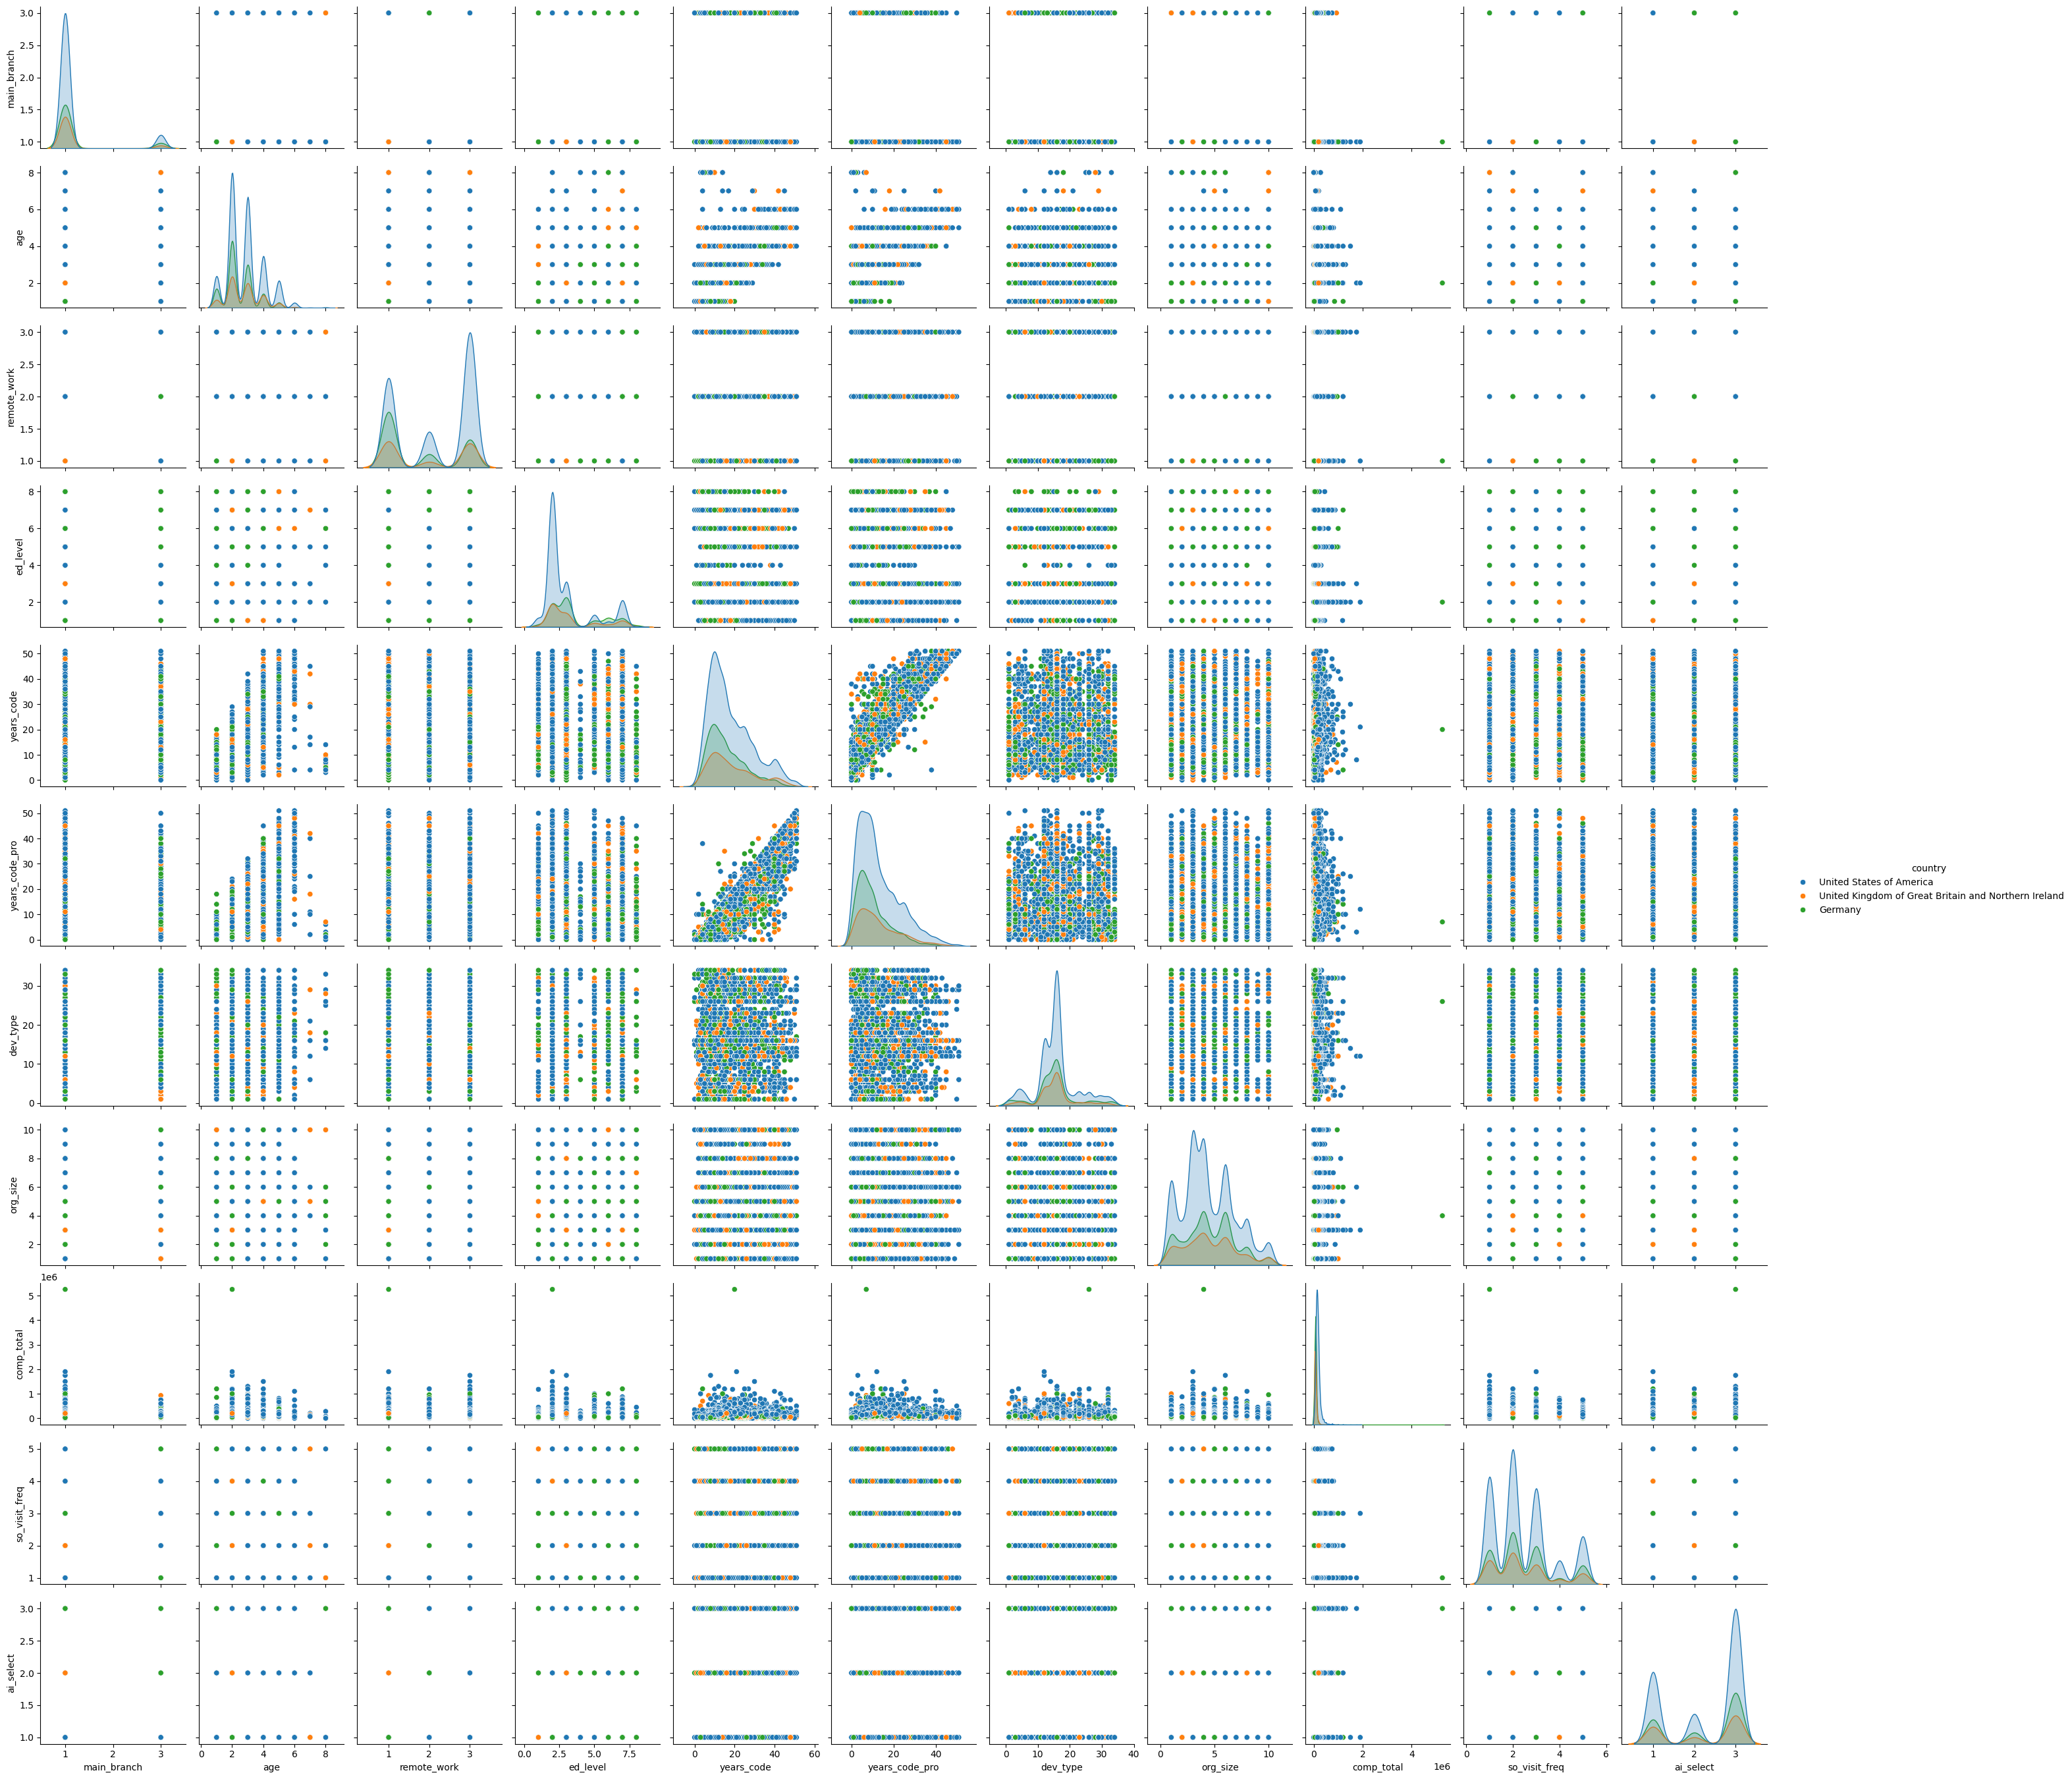

In [135]:
sns.pairplot(df_processed, hue='country');

<!-- Preprocess the data in the csv -->

<!-- Preprocess the data in the csv -->